In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm 
%matplotlib inline

In [2]:
ux = np.transpose(np.loadtxt('ux.dat', unpack = True))
uy = np.transpose(np.loadtxt('uy.dat', unpack = True))
x = np.transpose(np.loadtxt('x.dat', unpack = True))
y = np.transpose(np.loadtxt('y.dat', unpack = True))
rho = np.transpose(np.loadtxt('rho.dat', unpack = True))

print np.shape(uy)
print np.shape(ux)
print np.shape(y)
print np.shape(x)

(257, 257)
(257, 257)
(257,)
(257,)


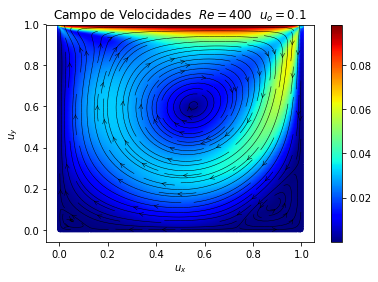

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

plt.figure()
plt.title("Campo de Velocidades  $Re = 400$  $u_{o} = 0.1$")
plt.xlabel("$u_{x}$")
plt.ylabel("$u_{y}$")
M = np.hypot(ux, uy)
Q = plt.quiver(x, y, ux, uy, M , cmap=plt.cm.jet, width=0.022,scale=1/0.1)
plt.colorbar()
plt.streamplot(x, y, ux, uy, color="k", linewidth=0.5,density=1.5, arrowstyle='->', arrowsize=1.0)#
#plt.savefig("Cavidad_2D_Re400.pdf")

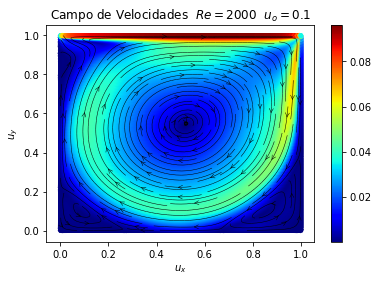

In [6]:
ux1 = np.transpose(np.loadtxt('ux2.dat', unpack = True))
uy1 = np.transpose(np.loadtxt('uy2.dat', unpack = True))
x1 = np.transpose(np.loadtxt('x1.dat', unpack = True))
y1 = np.transpose(np.loadtxt('y2.dat', unpack = True))
rho1 = np.transpose(np.loadtxt('rho2.dat', unpack = True))

import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

plt.figure()
plt.title("Campo de Velocidades  $Re = 2000$  $u_{o} = 0.1$")
plt.xlabel("$u_{x}$")
plt.ylabel("$u_{y}$")
M = np.hypot(ux1, uy1)
Q = plt.quiver(x1, y1, ux1, uy1, M , cmap=plt.cm.jet, width=0.022,scale=1/0.1)
plt.colorbar()
plt.streamplot(x1, y1, ux1, uy1, color="k", linewidth=0.5,density=1.5, arrowstyle='->', arrowsize=1.0)
#plt.savefig("Cavidad_2D_Re2000.pdf")

# Algunas herramientas para graficar 3D

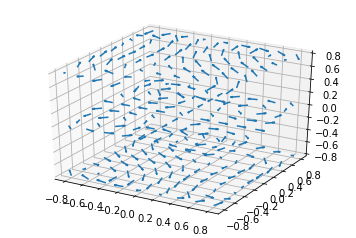

In [6]:

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w =  np.cos(np.pi * y**2) * np.sin(np.pi * z)

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()


In [2]:
UX = np.transpose(np.loadtxt('3Dux.dat', unpack = True))
UY = np.transpose(np.loadtxt('3Duy.dat', unpack = True))
X = np.transpose(np.loadtxt('3Dx.dat', unpack = True))
Y = np.transpose(np.loadtxt('3Dy.dat', unpack = True))
Z = np.transpose(np.loadtxt('3Dz.dat', unpack = True))

np.shape(UY)

(132098,)

In [16]:
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
from itertools import product
from matplotlib import cm
from scipy.integrate import ode as ode
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

class charge:
    def __init__(self, q, pos):
        self.q=q
        self.pos=pos
 
def E_point_charge(q, a, x, y, z):
    deno = ((x-a[0])**2+(y-a[1])**2+(z-a[2])**2)**(1.5)
    return q*(x-a[0])/deno, q*(y-a[1])/deno, q*(z-a[2])/deno
 
def E_total(x, y, z, charges):
    Ex, Ey, Ez = 0, 0, 0
    for C in charges:
        E = E_point_charge(C.q, C.pos, x, y, z)
        Ex = Ex+E[0]
        Ey = Ey+E[1]
        Ez = Ez+E[2]
    return [ Ex, Ey, Ez ]

def E_dir(t, p, charges):
    Ex, Ey, Ez = E_total(p[0], p[1], p[2], charges)
    n = np.sqrt(Ex**2+Ey**2+Ez**2)
    return [Ex/n, Ey/n, Ez/n]

def V_point_charge(q, p, x, y, z):
    deno = np.sqrt((x-p[0])**2+(y-p[1])**2+(z-p[2])**2)
    return q/deno

def V_total(x, y, z, charges):
    V = 0
    for C in charges:
        Vp = V_point_charge(C.q, C.pos, x, y, z)
        V = V+Vp
    return V



# charges and positions
charges=[ charge(-1, [-1, 0,0]), charge(1, [1, 0,0]) ]
 
# calculate field lines
x0, x1 = -2, 2
y0, y1 = -2, 2
z0, z1 = -2, 2

R = 0.3
# loop over all charges
xs, ys, zs = [], [], []
for C in charges:
    # calculate field lines starting in current charge
    dt = 0.8*R
    if C.q < 0:
        dt = -dt
    # loop over field lines starting in different directions 
    # around current charge
    for alpha,beta in product(np.linspace(0, 2*np.pi*11/12, 12),np.linspace(0, 2*np.pi*11/12, 12)):
        r=ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        # initial position of the electric field line
        x=[ C.pos[0] + np.cos(alpha)*np.cos(beta)*R ]
        y=[ C.pos[1] + np.sin(alpha)*np.cos(beta)*R ]
        z=[ C.pos[2] + np.sin(beta)*R ]
        r.set_initial_value([x[0], y[0], z[0]], 0)
        while r.successful():
            r.integrate(r.t+dt)
            x.append(r.y[0])
            y.append(r.y[1])
            z.append(r.y[2])
            hit_charge = False
            # check if field line left drwaing area or ends in some charge
            for C2 in charges:
                dist = np.sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2+(r.y[2]-C2.pos[2])**2)
                if dist < R:
                    hit_charge=True
            if hit_charge or (not (x0<r.y[0] and r.y[0]<x1)) or \
                    (not (y0<r.y[1] and r.y[1]<y1)) or (not (z0<r.y[2] and r.y[2]<z1)):
                break
        xs.append(x)
        ys.append(y)
        zs.append(z)




data = []
for x, y, z in zip(xs,ys,zs):
    trace = go.Scatter3d(
        x=x, y=y, z=z,
        line=dict(color='#000000'),
        mode="lines",
        name="",
        showlegend=False,
    )
    data.append(trace)



# colormap of the electric field
# here, the cm.jet is used
cmfunc = lambda x: 255*cm.jet(x)
pl_BrBG = [ [x, "rgb(%d,%d,%d)"%(255*cmfunc(x)[0],255*cmfunc(x)[1],255*cmfunc(x)[2])] for x in np.linspace(0,1,11) ]


def get_the_slice(x,y,z, surfacecolor,  colorscale=pl_BrBG, showscale=False):
    return go.Surface(x=x,# https://plot.ly/python/reference/#surface
                   y=y,
                   z=z,
                   surfacecolor=surfacecolor,
                   colorscale=colorscale,
                   showscale=showscale,
                   name="")



def get_lims_colors(surfacecolor):# color limits for a slice
    return np.min(surfacecolor), np.max(surfacecolor)




x = np.linspace(-2,2, 20)
y = np.linspace(-2,2, 20)
x,y = np.meshgrid(x,y)
z = np.zeros(x.shape)

surfcolor_z = V_total(x,y,z,charges)
slice_z = get_the_slice(x,y,z, surfcolor_z)



x=np.linspace(-2,2, 20)
z=np.linspace(-2,2, 20)
x,z=np.meshgrid(x,y)

y=np.zeros(x.shape)

surfcolor_y = V_total(x,y,z,charges)
slice_y = get_the_slice(x,y,z, surfcolor_y)


vmin,vmax = -3,3
slice_z.update(cmin=vmin, cmax=vmax)
slice_y.update(cmin=vmin, cmax=vmax, showscale=True,
               colorbar=go.ColorBar(title='Potential [a.u.]'),)



data.append(slice_z)
data.append(slice_y)


axis = dict(showbackground=True, 
            backgroundcolor="rgb(230, 230,230)",
            gridcolor="rgb(255, 255, 255)",      
            zerolinecolor="rgb(255, 255, 255)",  
            )

layout = go.Layout(
         width=600,
         height=700,
         scene=go.Scene(xaxis=go.XAxis(axis),
                        yaxis=go.YAxis(axis), 
                        zaxis=go.ZAxis(axis, range=[-2,2]), 
                        aspectratio=dict(x=2, y=2, z=2),
                        ),
        )



fig = dict(data=data,layout=layout)
py.iplot(fig)
plt.show()